Cloning into 'SpineDetector'...
remote: Enumerating objects: 5206, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 5206 (delta 5), reused 19 (delta 4), pack-reused 5184
Receiving objects: 100% (5206/5206), 112.56 MiB | 18.96 MiB/s, done.
Resolving deltas: 100% (280/280), done.
Updating files: 100% (5257/5257), done.


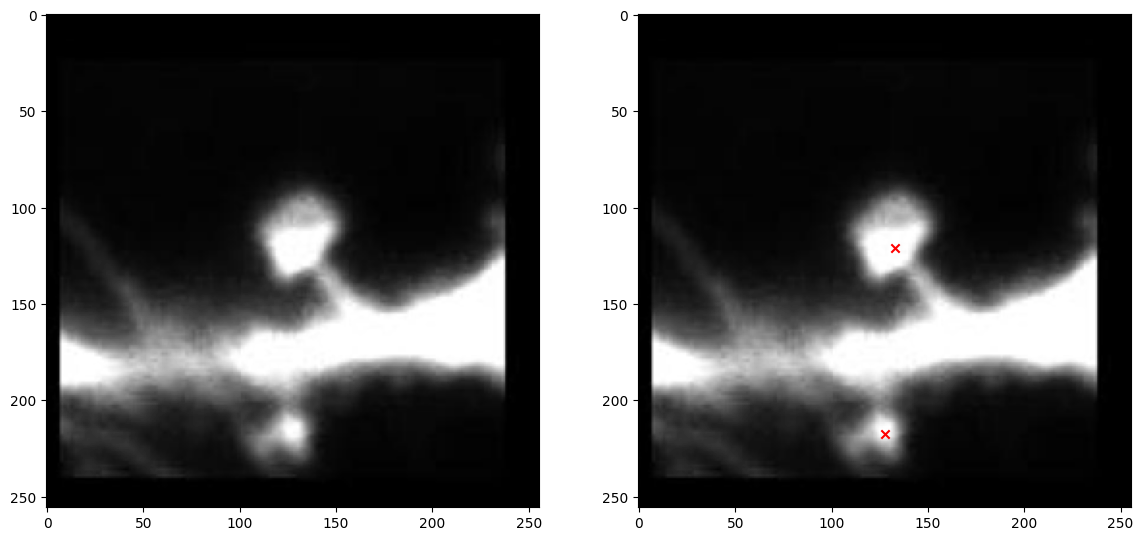

Accuracy: 1.0


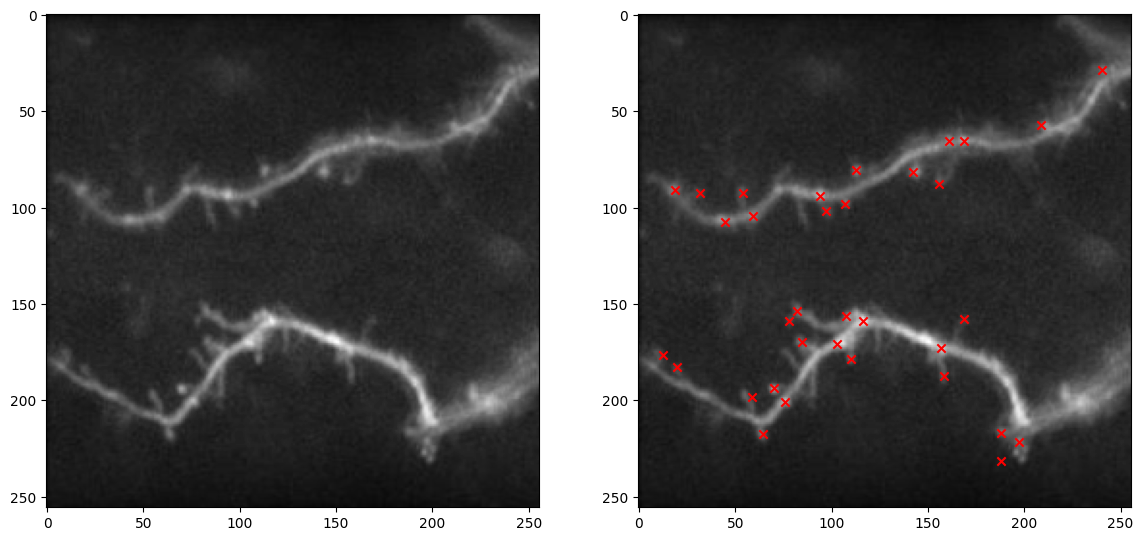

Accuracy: 1.0


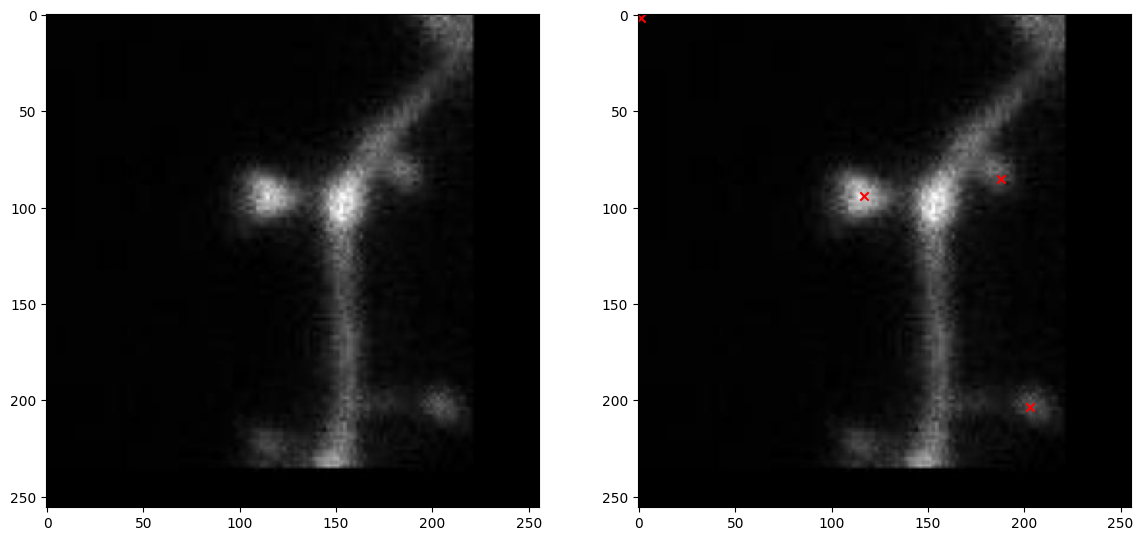

Accuracy: 1.0


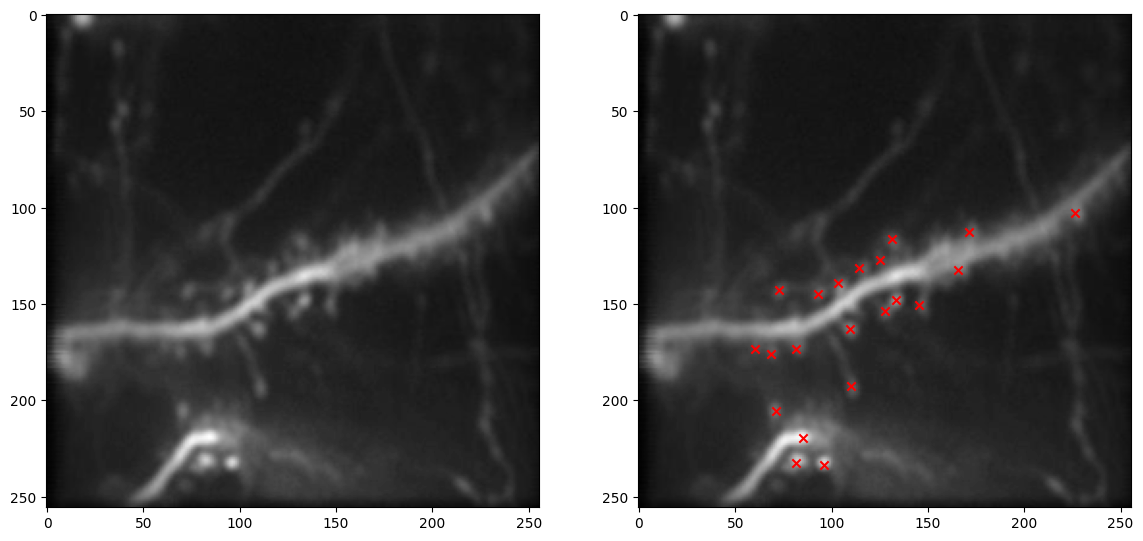

Accuracy: 1.0


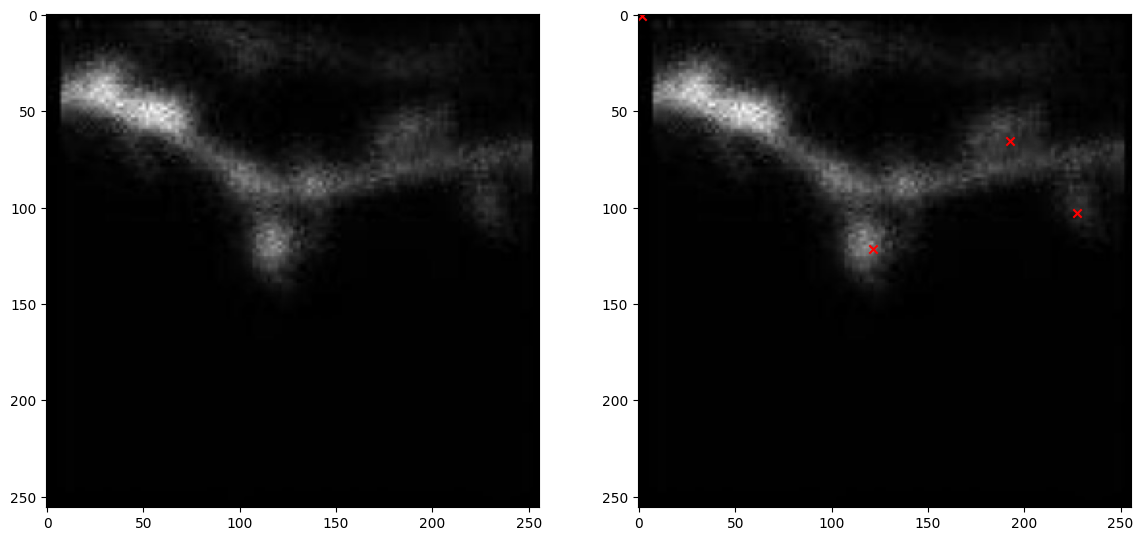

Accuracy: 1.0


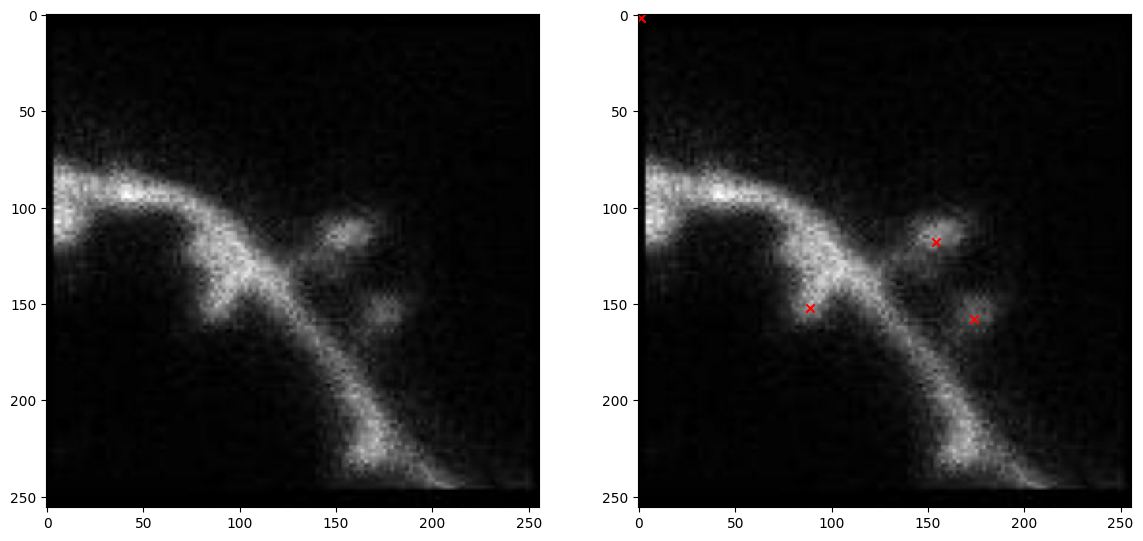

Accuracy: 1.0


In [1]:
!git clone https://github.com/ryoheiyasuda/SpineDetector.git
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def process_images(file_paths):
    folder = '/content/SpineDetector/New_Dataset3'
    images = os.listdir(os.path.join(folder, 'train', 'images'))

    for idx in file_paths:
        if idx >= len(images):
            print(f"Index {idx} is out of range for the images list.")
            continue

        image_fpath = os.path.join(folder, 'train', 'images', images[idx])
        img = Image.open(image_fpath)
        img = img.resize((256, 256)).convert("L")  # Resize and convert to grayscale

        label_fname = images[idx].strip(".jpg") + ".txt"
        label_fpath = os.path.join(folder, 'train', 'labels', label_fname)
        lbl = np.loadtxt(label_fpath)

        x = lbl[:, 1] * 255
        y = lbl[:, 2] * 255

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
        ax1.imshow(img, cmap="gray")
        ax2.imshow(img, cmap="gray")
        ax2.scatter(x, y, color="r", marker="x")
        plt.show()

        threshold = 65
        img_thresh = img.point(lambda value: 255 if value > threshold else 0)

        x = np.array(img_thresh).reshape(-1)
        y = lbl[:, 0].astype(int)

        # Match lengths of x and y
        min_length = min(len(x), len(y))
        x = x[:min_length]
        y = y[:min_length]

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        X_train = X_train.reshape(-1, 1)

        rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_classifier.fit(X_train, y_train)

        if X_test.ndim == 1:
            X_test = X_test.reshape(-1, 1)
        y_pred = rf_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy:", accuracy)


file_paths = [127, 128, 126, 125, 124, 130]  # List of image indices
process_images(file_paths)
